In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [156]:
df = pd.read_csv("Admission_Predict.csv")

In [157]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [158]:
df.tail()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [159]:
df = df.drop('Serial No.', axis =1)

In [160]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [162]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [163]:
df.isnull().sum().sum()

0

In [164]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [165]:
df['Chance of Admit ']= [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]

In [166]:
x = df.drop(['Chance of Admit '],axis=1)

In [167]:
y = df['Chance of Admit ']

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size=0.25)

In [170]:
x.shape

(400, 7)

In [171]:
x_train.shape

(300, 7)

In [172]:
y_train.shape

(300,)

In [173]:
x_test.shape

(100, 7)

In [174]:
y_test.shape

(100,)

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
model = DecisionTreeClassifier(random_state=0)

In [177]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [178]:
y_pred = model.predict(x_test)

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay ,accuracy_score

In [180]:
from sklearn.metrics import classification_report

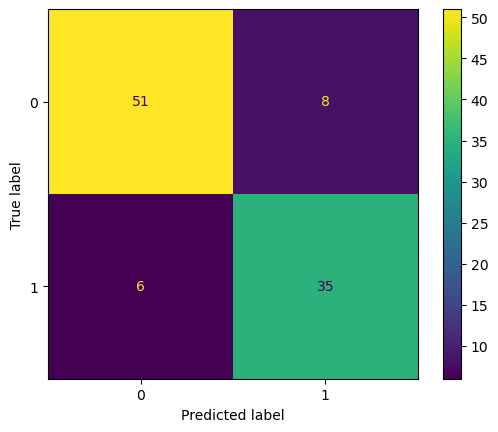

In [181]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [182]:
accuracy_score(y_test,y_pred)

0.86

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        59
           1       0.81      0.85      0.83        41

    accuracy                           0.86       100
   macro avg       0.85      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [184]:
from sklearn.tree import plot_tree

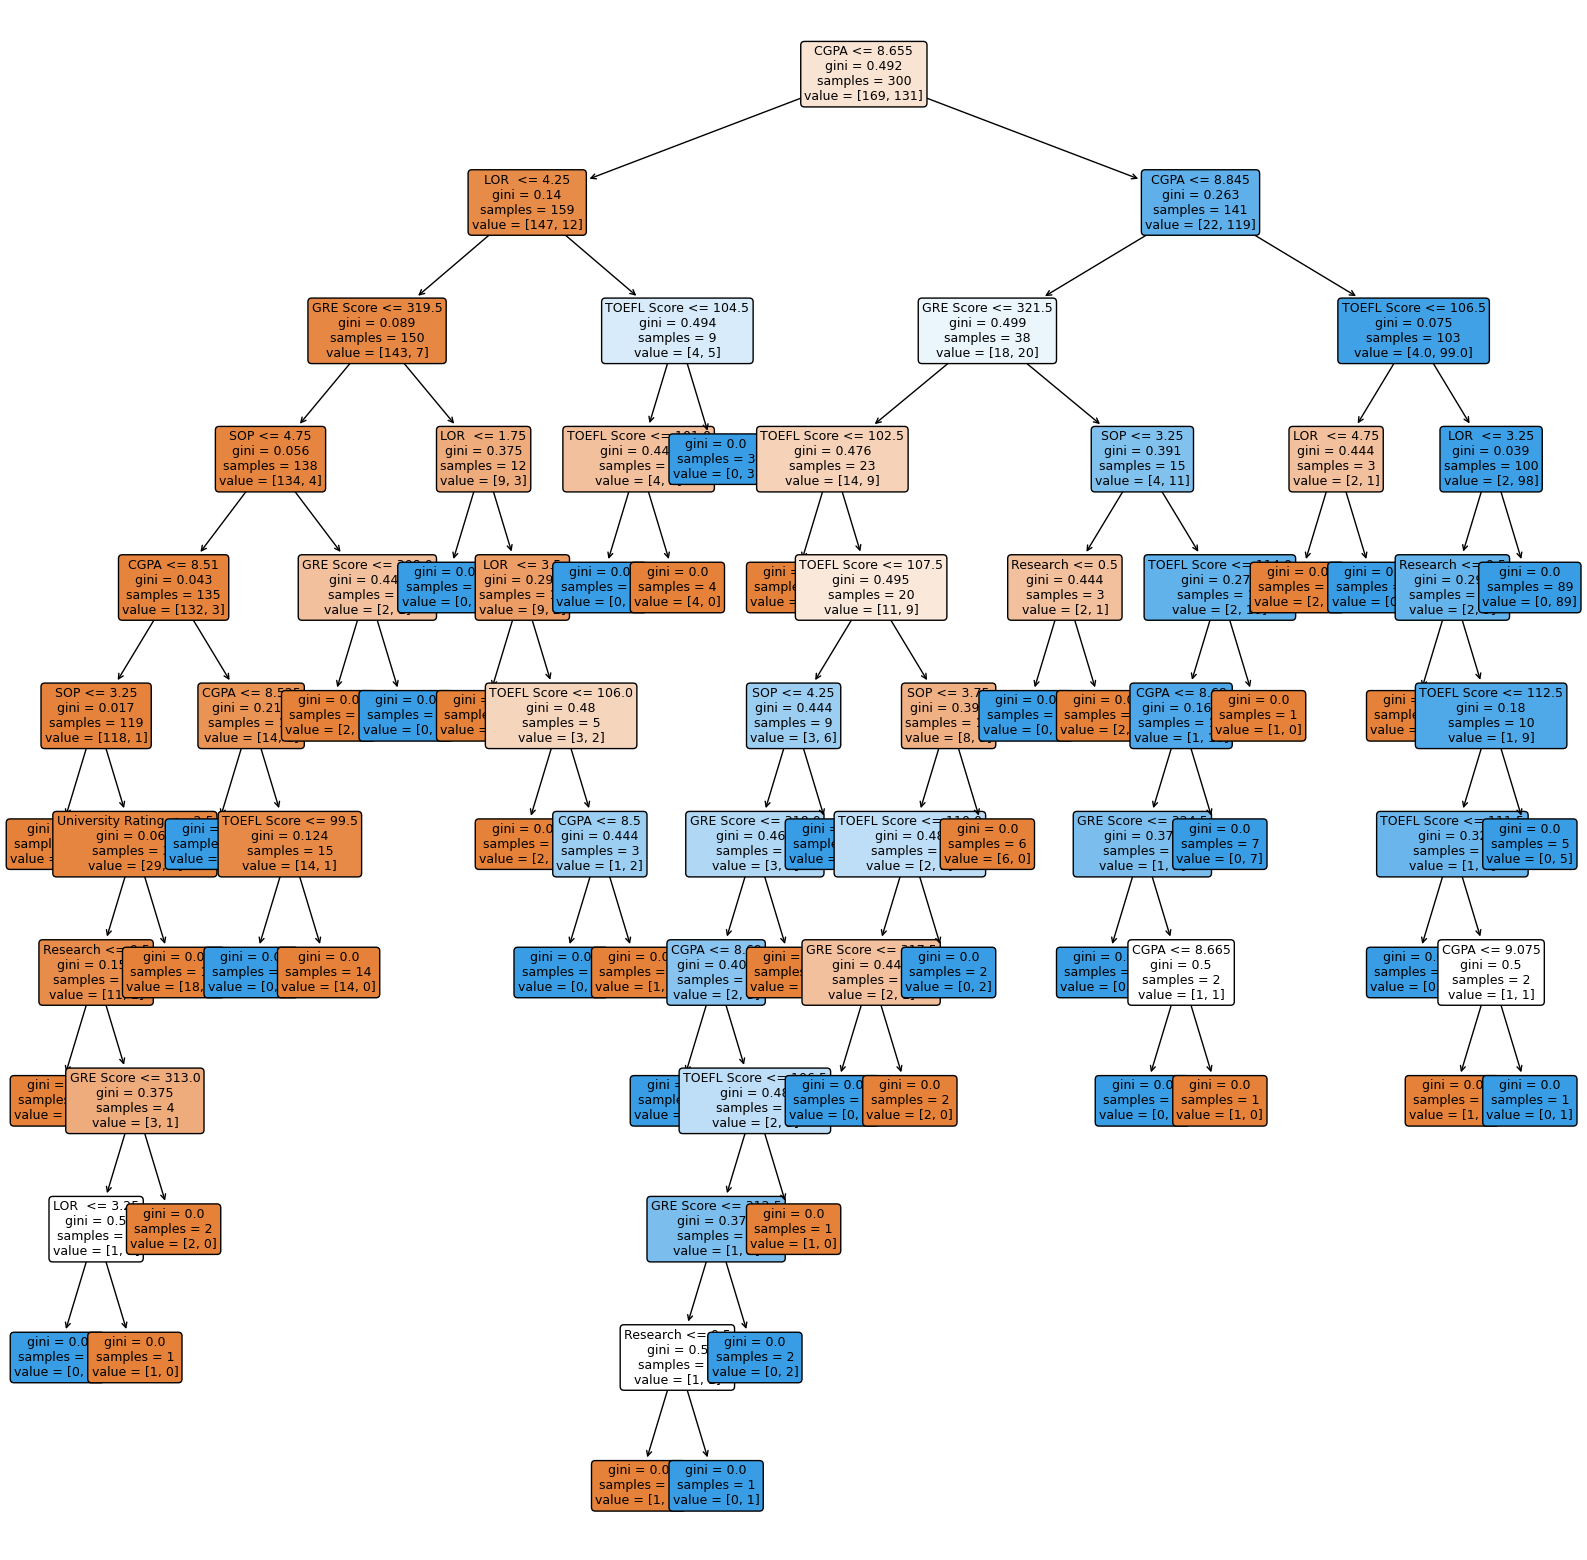

In [185]:
 plt.figure(figsize = (20,20))
 plot_tree(model, fontsize = 9,filled=True,rounded=True ,feature_names = x.columns);